## Observations and Insights 

I didn't note any outliers in the Capomulin trial or other drug trials; there was an outlier, however, in the Infubinol trail whose tumor volume was significantly smaller than other mice's tumor volumes. One outlier alone is not enough to suggest an effect in this particular drug trial, however, and could have been due to a number of other factors.
The gender distribution was even and would not have accounted for differences in any of the trials. Gender can be a confounding variable if there's an uneven ratio of male:female individuals in a study, so I thought this was logical and correct on the part of the study's scientists. 
The individual ("Rando_mouse") pulled for the line plot on Capomulin vs. tunmor volume over time did show what appears to be a remarkable decrease in tumor volume. I could not say whether this is statistically significant at all since the sample size is n = 1. 
The correlation coefficient for average mouse weight vs. average tumor volume is similarly unremarkable; a Pearson's of 0.53 is indicative of only a moderate positive correlation between the two factors, although one would expect it to be slightly higher than that since body weight might accommodate a tumor of corresponding proportional volume. I would conclude by saying that based on my observations within this dataset and the visualizations generated, the Capomulin and Ramicane appeared to be comparable (though modest) in their efficacies in reducing tumor volume in the mice in this study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_scc_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
mouse_scc_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice (.unique).
mouse_total = len(mouse_scc_df["Mouse ID"].unique())
print(mouse_total)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_scc_df.groupby(["Mouse ID", "Timepoint"])
#mouse_scc_df[["Mouse ID", "Timepoint"]].duplicated()
mouse_dupes = mouse_scc_df[["Mouse ID", "Timepoint"]].duplicated()
#mouse_scc_df [mouse_dupes]
mouse_scc_df[mouse_dupes]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_scc_df.drop_duplicates(["Mouse ID", "Timepoint"])
mouse_scc_df = mouse_scc_df.drop_duplicates(["Mouse ID", "Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_total = len(mouse_scc_df["Mouse ID"].unique())
print(mouse_total)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#print(mouse_scc_df["Drug Regimen"].unique())
mouse_scc_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
mouse_scc_df_bydrug = mouse_scc_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = mouse_scc_df_bydrug.mean()
median = mouse_scc_df_bydrug.median()
var = mouse_scc_df_bydrug.var()
std = mouse_scc_df_bydrug.std()
sem = mouse_scc_df_bydrug.sem()

#daisychained the stats together using .merge() function
#mean.merge(median, on="Drug Regimen").merge(var, on="Drug Regimen").merge(std, on= "Drug Regimen").merge(sem, on= "Drug Regimen")
#rename the columns to reflect the stats beneath each
#doesn't work, error is 'DF Groupby object not callable' mouse_scc_df_bydrug.rename(columns = {'Tumor Volume (mm3)_x':'Mean', 'Tumor Volume (mm3)_y':'Median', 'Tumor Volume (mm3)_x':'Variance', 'Tumor Volume (mm3)_y':'Std Dev', 'Tumor Volume (mm3)':'SEM'})
stat_summ1_df = pd.DataFrame({'mean': mean, 'median': median, 'var': var, 'std': std, 'sem': sem})
stat_summ1_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_scc_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean", "median", "std",
                                                                                 "sem", "var"])

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.393463  50.909965  6.568014  0.525862  43.138803
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

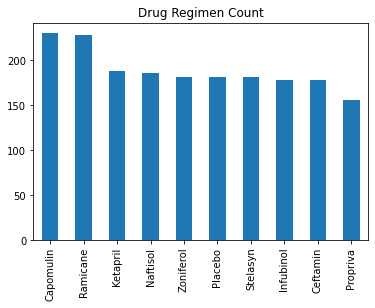

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#pandas quickly generates a bar plot that allows a quick view of data, but isn't easy to format
drug_reg_count = mouse_scc_df["Drug Regimen"].value_counts()
drug_reg_count.plot.bar()
plt.title("Drug Regimen Count")
plt.show()

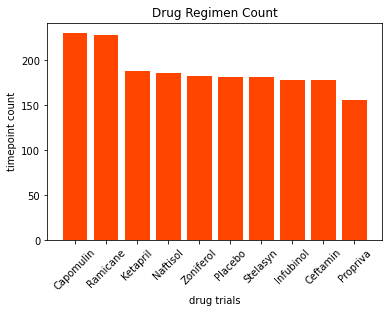

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_reg_count.index, drug_reg_count.values, color= "orangered")
plt.title("Drug Regimen Count")
plt.xlabel("drug trials")
plt.ylabel("timepoint count")
plt.xticks(rotation = 45)
plt.show()

Male      958
Female    930
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender Count')

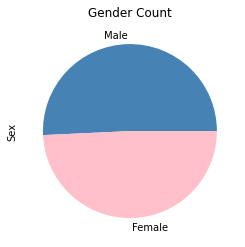

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_scc_df["Sex"].value_counts()
print(gender_count)
colors = ['steelblue', 'pink']
gender_count.plot(kind='pie', colors= colors)
plt.title("Gender Count")
#plt.show()

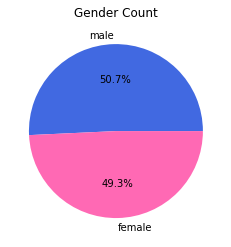

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['royalblue', 'hotpink']
labels = ['male', 'female']
plt.pie(gender_count, colors= colors, labels= labels, autopct = "%1.1f%%")
plt.title("Gender Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (sort the data)
final_tumor_vol = mouse_scc_df.groupby("Mouse ID")["Timepoint"].max()
final_tumor_vol = final_tumor_vol.reset_index()
final_tumor_vol.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
end_tumor_vol = final_tumor_vol.merge(mouse_scc_df, on= ["Mouse ID", "Timepoint"], how = "left")
end_tumor_vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    each_drug_vol = end_tumor_vol.loc[end_tumor_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumor_vol_data.append(each_drug_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = each_drug_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_tumors = each_drug_vol.loc[(each_drug_vol < lower_bound) | (each_drug_vol > upper_bound)]
    
    print("Outliers for", drug)
    print(outlier_tumors)

Outliers for Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

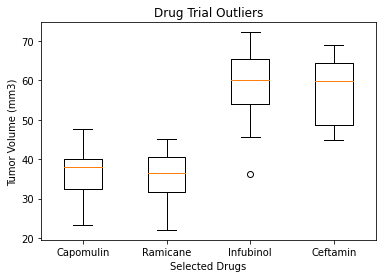

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = drug_list)
plt.title("Drug Trial Outliers")
plt.xlabel("Selected Drugs")
plt.ylabel("Tumor Volume (mm3)")
plt.show


## Line and Scatter Plots

In [18]:
#need to know the timepoint start and end
end_tumor_vol.describe()

,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,32.911647,12.730924,26.116466,54.999137,1.682731
std,15.465109,7.228687,3.697003,12.655080,1.325823
min,0.000000,1.000000,15.000000,22.050126,0.000000
25%,20.000000,6.000000,25.000000,45.934712,1.000000
50%,45.000000,13.000000,27.000000,55.841410,1.000000
75%,45.000000,19.000000,29.000000,64.957562,3.000000
max,45.000000,24.000000,30.000000,78.567014,4.000000


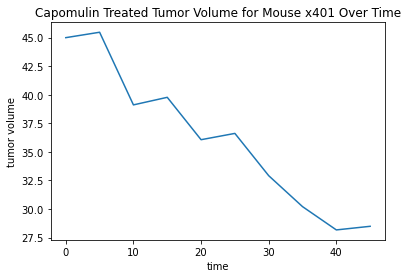

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Rando_mouse = mouse_scc_df.loc[mouse_scc_df["Mouse ID"] == "x401"]

Time = Rando_mouse["Timepoint"]
Volume = Rando_mouse["Tumor Volume (mm3)"]
#found start and end timepoints using the .describe() function
x_axis_data = np.arange(0, 45, 1)
plt.plot(Time, Volume)
plt.xlabel("time")
plt.ylabel("tumor volume")
plt.title("Capomulin Treated Tumor Volume for Mouse x401 Over Time")
plt.show()

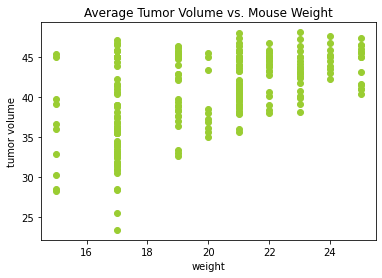

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_average = mouse_scc_df.loc[mouse_scc_df["Drug Regimen"]== "Capomulin"]
Weight = Cap_average.groupby(["Mouse ID"]).mean()
avg_vol = Cap_average["Tumor Volume (mm3)"]
avg_wt = Cap_average["Weight (g)"]

plt.scatter(avg_wt, avg_vol, marker="o", facecolors="yellowgreen")
plt.xlabel("weight")
plt.ylabel("tumor volume")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(avg_wt, avg_vol)[0],2)}")

The correlation coefficient between weight and average tumor volume is 0.53
